## Probabilidad I
**Tarea-Examen_5**


Diego Marquez Franco



##**Ejercicio1**


El objetivo de esta ejercicio es utilizar la Ley de los Grandes Números para aproximar integrales de
funciones continuas en intervalos finitos. Esta vez procuraremos aproximar la probabilidad de que
una variable $Z$ ∼$ Gamma(4, 1)$ tome valores en un intervalo $[a, b] ⊂ [0, +∞)$. Es decir, queremos
aproximar numéricamente la siguiente integral

$$\int_a^b \frac{x^3}{3!} e^{-x} \, dx$$


In [ ]:
import numpy as np
import math

# Cada metodo esta explicado más abajo
class Aproximar_z:
    def __init__(self, a, b):  # Constructor
        self.a = a
        self.b = b

    def obtener_Y(self):  # Método para calcular Y
        # Generamos U, una variable uniforme entre [0, 1]
        U = np.random.uniform(0, 1)
        # Calculamos alfa y beta para transformar U a Y ~ U[a, b]
        alfa = self.b - self.a
        beta = self.a
        # Usamos la fórmula para calcular Y
        Y = alfa * U + beta
        return Y

    def calcular_integral(self):  # Método para calcular la integral exacta
        # Aquí ya usamos la fórmula de la integral que resolvi a mano
        resultado = (
            (6 + 6 * self.a + 3 * self.a**2 + self.a**3) * np.exp(-self.a)
            - (6 + self.b * (6 + self.b * (3 + self.b))) * np.exp(-self.b)
        )
        return resultado

    def esperanza_Z(self):  # Método para calcular la esperanza de z
        E = (((self.b - self.a) * np.math.factorial(3))**(-1)) * self.calcular_integral()
        return E
    def sucesiones_de_Y(self, n):  # Método para calcular Z barra
        suma_Z = 0  # Aquí acumulamos los valores de Z
        for _ in range(n):
            Y = self.obtener_Y()  # Generamos un valor de Y
            # Calculamos Z con la fórmula dada
            Z = (Y**3 * np.exp(-Y)) / np.math.factorial(3)
            suma_Z += Z  # Lo sumamos a la acumulación
        # Calculamos Z barra dividiendo la suma por n
        Z_barra = suma_Z / n
        return Z_barra


# Ejemplo para los intervalos y n especificados
valores_a_b = [(0, 2), (2, 6), (0, 8)]
n_valores = [100, 1000, 50000]

for a, b in valores_a_b:
    aproximador = Aproximar_z(a, b)
    print(f"\nIntervalo: [{a}, {b}]")

    esperanza_teorica = aproximador.esperanza_Z()
    print(f"Esperanza teórica (E[Z]): {esperanza_teorica:.5f}")

    for n in n_valores:
        Z_barra = aproximador.sucesiones_de_Y(n)
        print(f"n = {n}, Z_barra (simulación): {Z_barra:.5f}")




Intervalo: [0, 2]
Esperanza teórica (E[Z]): 0.07144
n = 100, Z_barra (simulación): 0.07526
n = 1000, Z_barra (simulación): 0.06911


<ipython-input-1-c60b61c3b92e>:29: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  E = (((self.b - self.a) * np.math.factorial(3))**(-1)) * self.calcular_integral()
<ipython-input-1-c60b61c3b92e>:36: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  Z = (Y**3 * np.exp(-Y)) / np.math.factorial(3)


n = 50000, Z_barra (simulación): 0.07150

Intervalo: [2, 6]
Esperanza teórica (E[Z]): 0.17648
n = 100, Z_barra (simulación): 0.17282
n = 1000, Z_barra (simulación): 0.17805
n = 50000, Z_barra (simulación): 0.17624

Intervalo: [0, 8]
Esperanza teórica (E[Z]): 0.11970
n = 100, Z_barra (simulación): 0.12435
n = 1000, Z_barra (simulación): 0.11786
n = 50000, Z_barra (simulación): 0.12003





#### Método 1: obtener_Y
En este método obtenemos la variable \( Y \), que queremos que esté distribuida uniformemente en el intervalo [a, b].  
Para esto, usamos la fórmula:  
$$ Y = \alpha U + \beta, \quad \alpha = b - a, \quad \beta = a $$
donde $ U $ es una variable aleatoria uniforme en [0, 1].   Y transformamos $ Y $ para que se ajuste al intervalo deseado.




#### **Método 2: calcular_integral**
Este método calcula la integral exacta de:  
$$
\int_a^b y^3 e^{-y} \, dy
$$
La integral la integral la resolvi a mano previamente. y usando directamente la fórmula,



#### **Método 3: esperanza_Z**
Aquí calculamos la esperanza teórica de $ Z $, usando:  
$$
E(Z) = \frac{1}{(b-a)3!} \int_a^b y^3 e^{-y} \, dy
$$
Ya que la integral está en el método anterior, solo usamos su resultado para obtener $ E(Z) $.

#### **Método 4: sucesiones_de_Y**
Este método es práctico. Lo que hace es usar simulaciones para aproximar $ \bar{Z}_n $, definido como:  
$$
\bar{Z}_n = \frac{1}{n} \sum_{i=1}^n Z_i, \quad Z_i = \frac{Y_i^3 e^{-Y_i}}{3!}
$$
Generamos $ n $ valores de $ Y $, calculamos $ Z $ para cada uno, y luego promediamos.  
Según la **Ley de los Grandes Números**, $bar{Z}_n$ debería acercarse a la verdadera$ E(Z)$ cuando $ n $ sea grande.


##**Ejercicio 2**
En este ejercicio estudiaremos la distribución del promedio de variables centradas, independientes e idénticamente distribuidas, reescaladas según la desviación estandar. En particular analizaremos el comportamiento de estas distribuciones a medida que promediamos un número creciente de variables aleatorias usando los histogramas correspondientes. Para ello, generaremos una muestra de variables aleatorias con una distribución dada y luego calcularemos el promedio de cada muestra. Replicaremos ésto mil veces, es decir, generaremos una muestra aleatoria de la variable Zn de tamaño 1000. Observe que, en principio, desconocemos la distribución de Zn. A partir de todas las replicaciones realizaremos un histograma para los promedios obtenidos para obtener una aproximación de la densidad o la función de probabilidad de Zn.


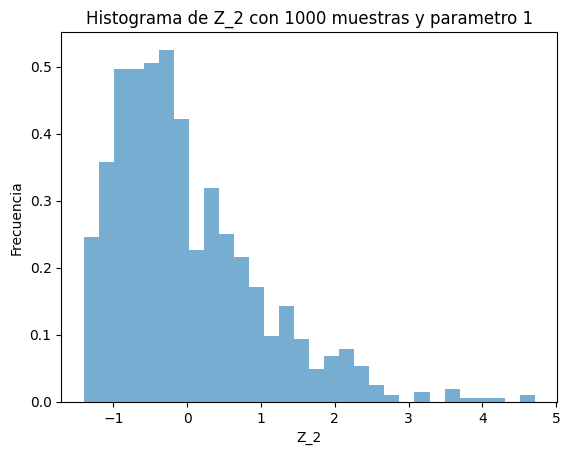

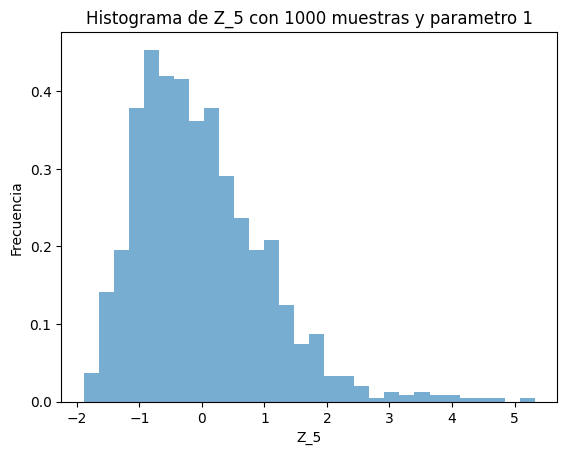

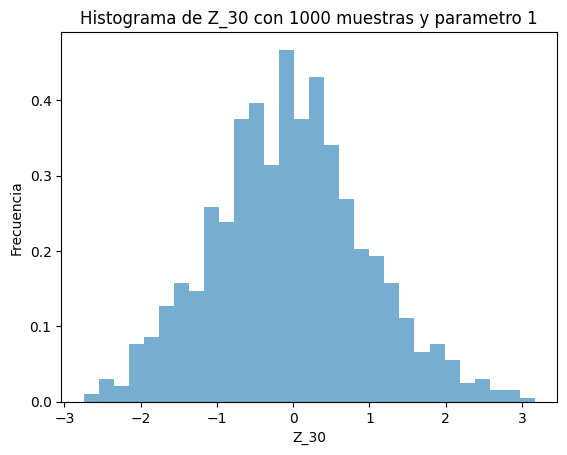

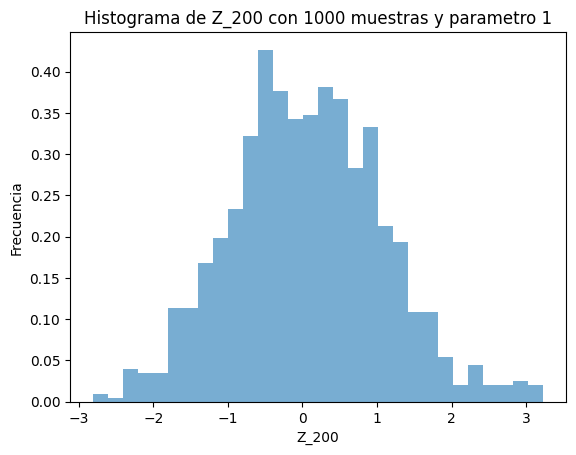

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Dist_prom_va_centradas:
    def __init__(self, n_muestras, k_variables ,parametro):
        # Aquí inicializamos los parámetros: cuántas veces queremos repetir el experimento
        # (n_muestras), cuántas variables aleatorias promediamos en cada intento (k_variables),
        # y el parámetro de la distribución exponencial (parametro)
        self.parametro = parametro
        self.n_muestras = n_muestras
        self.k_variables = k_variables

    def generar_variables(self):
        # Esta función genera una sola variable aleatoria con distribución Exp(1)
        X = np.random.exponential(self.parametro)
        return X

    def calcular_promedio_rescalado(self):
        # Generamos k_variables variables aleatorias y calculamos el promedio reescalado
        muestra = [self.generar_variables() for _ in range(self.k_variables)]
        # Hacemos el reescalado según la fórmula (promedio - k) / sqrt(k)
        Z_i = (sum(muestra)-self.k_variables) / np.sqrt(self.k_variables)
        return Z_i

    def graficar_histograma(self):
        # Creamos una lista con los promedios reescalados de todas las muestras
        promedios = [self.calcular_promedio_rescalado() for _ in range(self.n_muestras)]
        # Mostramos un histograma con los resultados
        plt.hist(promedios, bins=30, density=True, alpha=0.6)
        plt.title(f'Histograma de Z_{self.k_variables} con {self.n_muestras} muestras y parametro {self.parametro}')
        plt.xlabel(f'Z_{self.k_variables}')
        plt.ylabel('Frecuencia')
        plt.show()

# Ahora creamos distintos modelos con diferentes configuraciones y graficamos sus histogramas

modelo_2 = Dist_prom_va_centradas(1000, 2, 1)  # Usamos 2 variables aleatorias
modelo_2.graficar_histograma()

modelo_5 = Dist_prom_va_centradas(1000, 5, 1)  # Usamos 5 variables aleatorias
modelo_5.graficar_histograma()

modelo_30 = Dist_prom_va_centradas(1000, 30, 1)  # Usamos 30 variables aleatorias
modelo_30.graficar_histograma()

modelo_200 = Dist_prom_va_centradas(1000, 200, 1)  # Usamos 200 variables aleatorias
modelo_200.graficar_histograma()


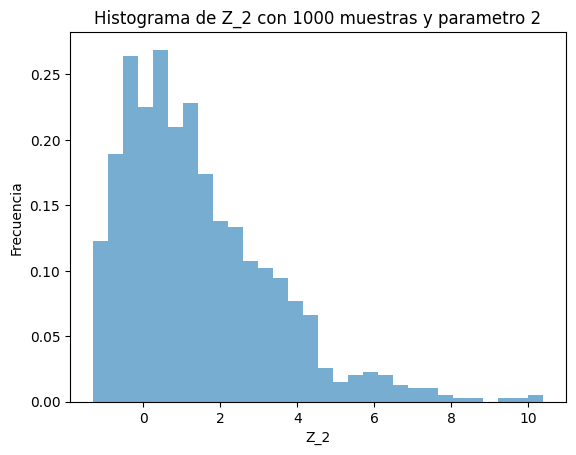

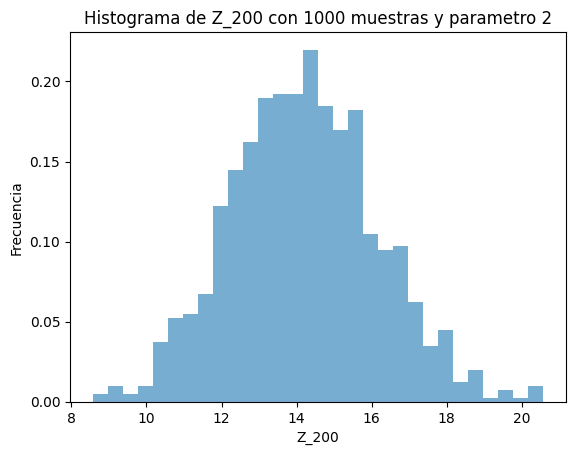

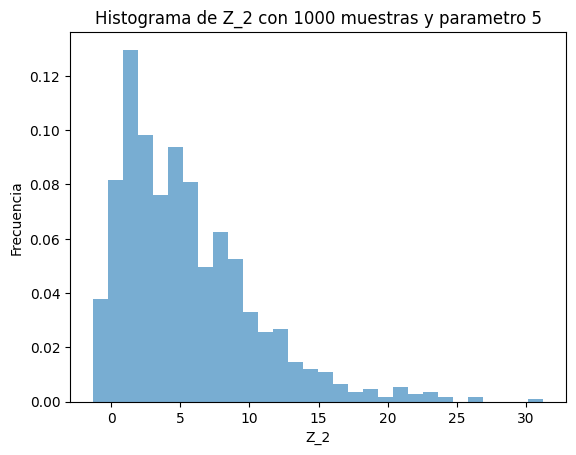

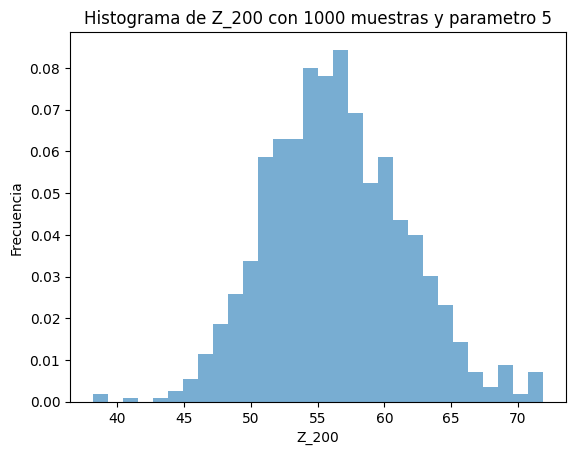

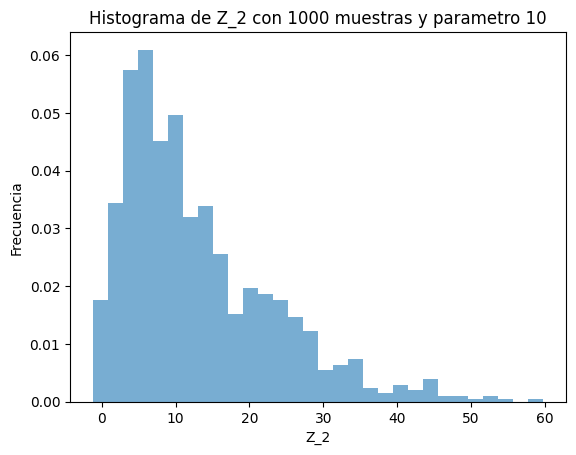

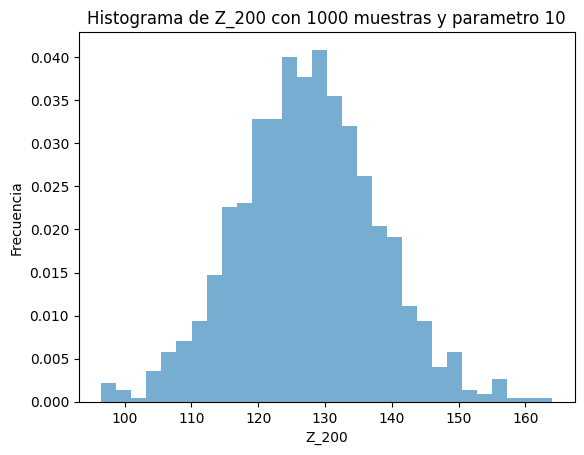

In [ ]:
parametro = [2,5,10]
variables = [2,200]
for pa in parametro: # aqui anidamos las iteraciones para simplificarlo
  for var in variables:
    modelo = Dist_prom_va_centradas(1000, var, pa)
    modelo.graficar_histograma()

### a) Histograma con 2 variables

Al promediar dos variables $X_1$ y $X_2$ con distribución Exp(1), el histograma de $Z_2 = \frac{(X_1 + X_2) - 2}{\sqrt{2}}$ muestra una forma algo sesgada, pero empieza a acercarse a una distribución normal.

### b) Histograma con 5 variables

Con 5 variables aleatorias $X_1, X_2, ..., X_5$ y el promedio $Z_5 = \frac{\sum_{i=1}^{5} X_i - 5}{\sqrt{5}}$, el histograma se hace más simétrico, acercándose a una distribución normal.

### c) Histograma con 30 variables

Con 30 variables $X_1, X_2, ..., X_{30}$ y el promedio $Z_{30} = \frac{\sum_{i=1}^{30} X_i - 30}{\sqrt{30}}$, el histograma se asemeja más a una distribución normal, siguiendo el teorema central del límite.

### d) Histograma con 200 variables

Al promediar 200 variables $X_1, X_2, ..., X_{200}$, el histograma se ajusta casi perfectamente a una distribución normal.

### e) Variación con diferentes valores de $\lambda$

Al usar $X_i \sim \text{Exp}(\lambda)$ para $\lambda = 2, 5, 10$, y reescalar usando su esperanza y desviación estándar, el histograma se ajusta a la escala de $\lambda$, pero sigue mostrando una tendencia normal a medida que promediamos más variables.


## Conclusión general

Este trabajo me gusto mucho porque pude aplicar mis conocimientos en programación mientras usaba los conceptos de proba que, como matemático aplicado, me gustan mucho. Me gusta ver cómo las matemáticas, esas que vemos en teoría, realmente funcionan en el mundo real, y este ejercicio fue una muestra clara de eso. Es impresionante cómo, al aumentar el número de variables, los histogramas se empiezan a parecer cada vez más a una distribución normal, algo que refuerza el famoso teorema central del límite. Ver cómo los números y las fórmulas toman vida en las simulaciones me hace sentir que todo lo que aprendemos tiene un propósito real.